# K-Means

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

X = np.array([4.4, 3.9, 4.2, 4.2, 3.8, -3.8, -4.2, -4, 3.0])
Y = np.array([-11, -12, -8, 6, 6.5, 3.2, 3.5, 4, -2.5])

k = 3

mean_X = np.mean(X)
mean_Y = np.mean(Y)

print(f"Средние значения: X: {mean_X}, Y: {mean_Y}")

std_dev_X = np.sqrt(np.sum((X - mean_X)**2) / len(X))
std_dev_Y = np.sqrt(np.sum((Y - mean_Y)**2) / len(Y))

print(f"Стандартные отколенения: X: {std_dev_X}, Y: {std_dev_Y}")

Средние значения: X: 1.2777777777777781, Y: -1.1444444444444446
Стандартные отколенения: X: 3.751674523248927, Y: 6.993665564258228


$σ = \sqrt{\frac{\sum_{i=1}^{N}(X_i - \overline{X})^2}{N}}$ $Z_i = \frac{X_i - \overline{X}}{\sigma_X}$

X_norm: [ 0.83222097  0.69894715  0.77891144  0.77891144  0.67229239 -1.3534697
 -1.46008875 -1.40677922  0.45905427]
Y_norm: [-1.40921173 -1.55219827 -0.98025213  1.02155935  1.09305262  0.62119705
  0.66409301  0.73558628 -0.19382619]


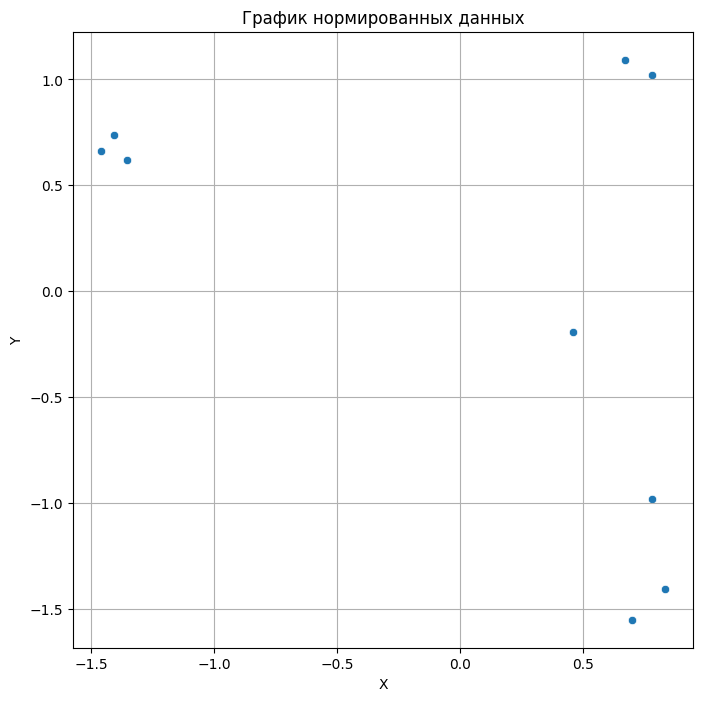

In [ ]:
norm_X = (X - mean_X) / std_dev_X
norm_Y = (Y - mean_Y) / std_dev_Y

print(f"X_norm: {norm_X}")
print(f"Y_norm: {norm_Y}")

plt.figure(figsize=(8, 8))
sns.scatterplot(x=norm_X, y=norm_Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График нормированных данных')
plt.grid(True)
plt.show()

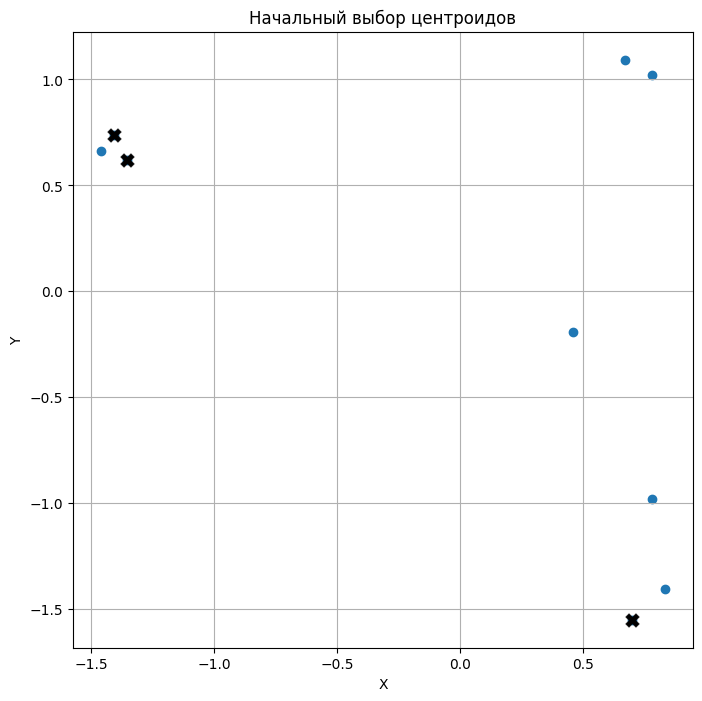

<ipython-input-21-8476c78f7c57>:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1').colors[:len(clusters.keys())]


<Figure size 640x480 with 0 Axes>

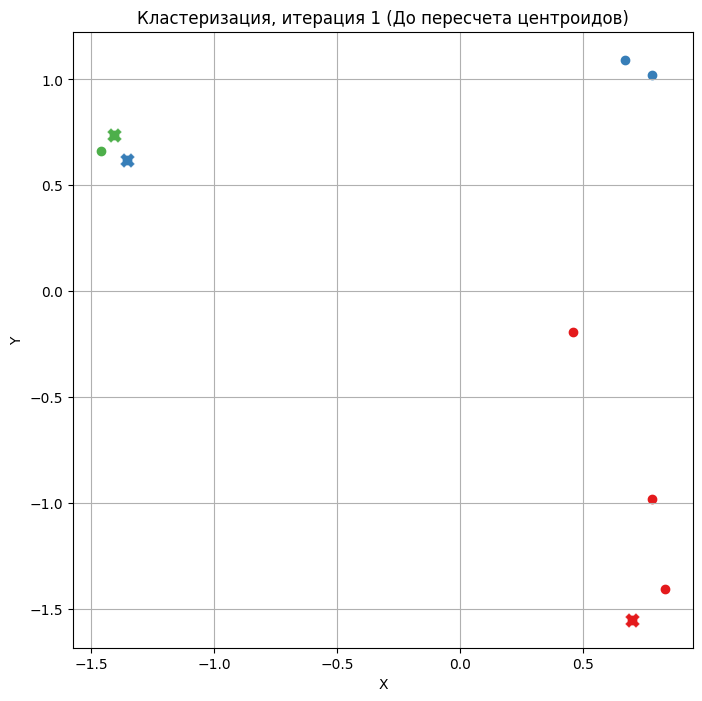

<Figure size 640x480 with 0 Axes>

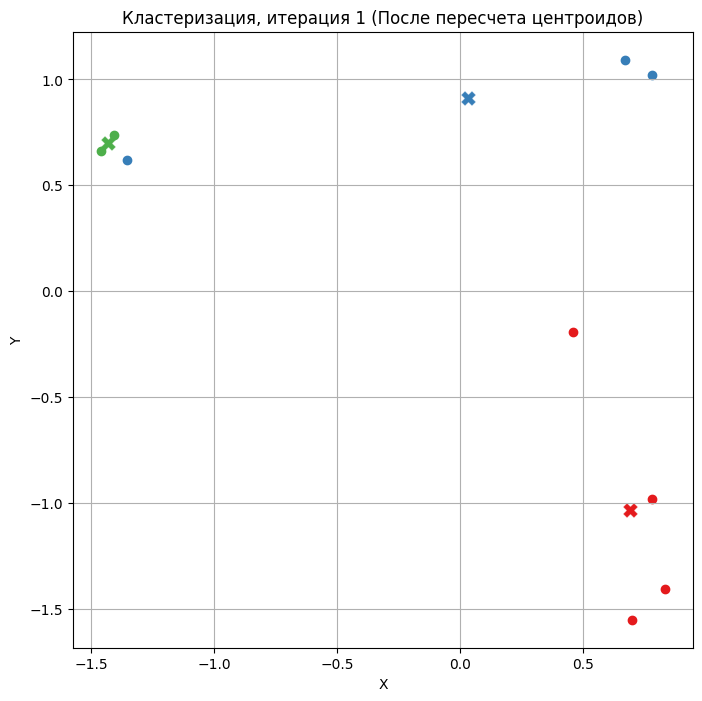

Словарь с центроидами и их точками:
{'Кластер 1': {'Центроид': array([ 0.69228346, -1.03387208]), 'Точки': [array([ 0.83222097, -1.40921173]), array([ 0.69894715, -1.55219827]), array([ 0.77891144, -0.98025213]), array([ 0.45905427, -0.19382619])]}, 'Кластер 2': {'Центроид': array([0.03257805, 0.91193634]), 'Точки': [array([0.77891144, 1.02155935]), array([0.67229239, 1.09305262]), array([-1.3534697 ,  0.62119705])]}, 'Кластер 3': {'Центроид': array([-1.43343399,  0.69983965]), 'Точки': [array([-1.46008875,  0.66409301]), array([-1.40677922,  0.73558628])]}}


<Figure size 640x480 with 0 Axes>

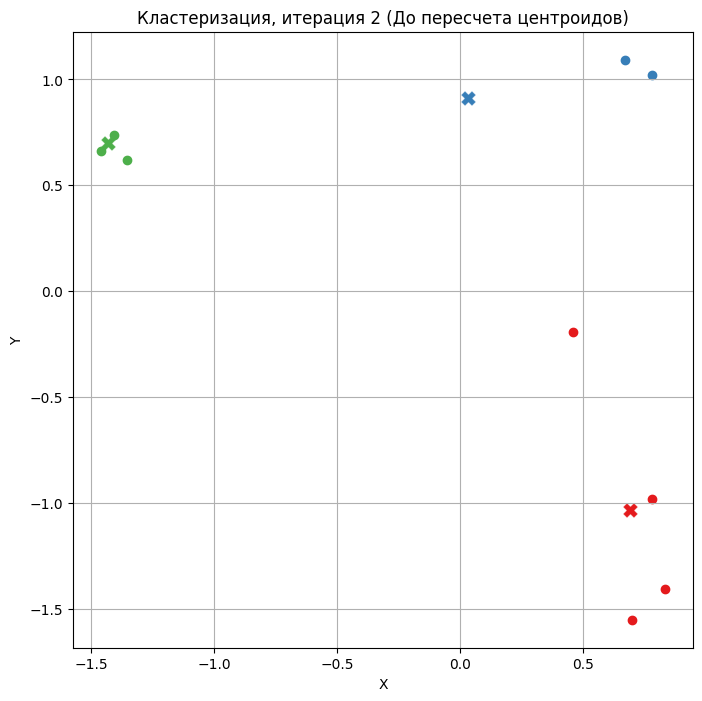

<Figure size 640x480 with 0 Axes>

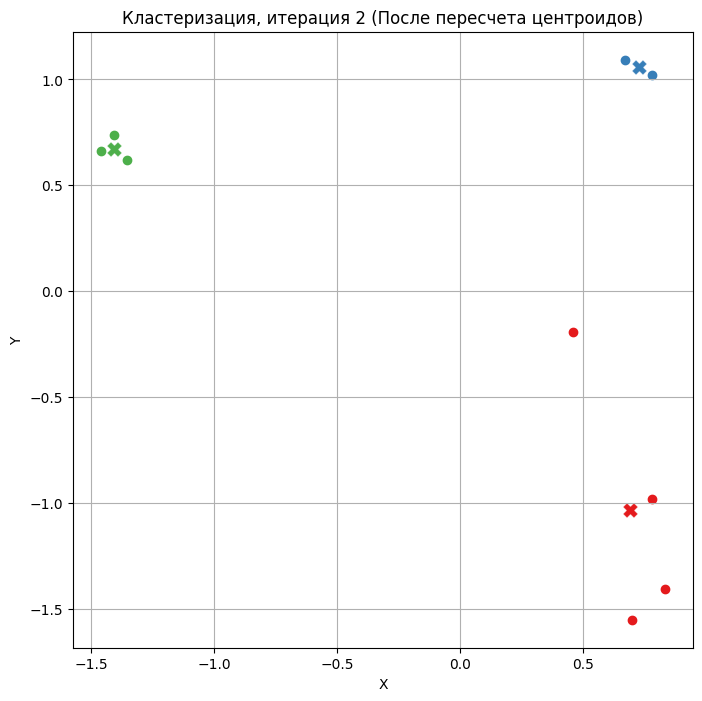

Словарь с центроидами и их точками:
{'Кластер 1': {'Центроид': array([ 0.69228346, -1.03387208]), 'Точки': [array([ 0.83222097, -1.40921173]), array([ 0.69894715, -1.55219827]), array([ 0.77891144, -0.98025213]), array([ 0.45905427, -0.19382619])]}, 'Кластер 2': {'Центроид': array([0.72560192, 1.05730598]), 'Точки': [array([0.77891144, 1.02155935]), array([0.67229239, 1.09305262])]}, 'Кластер 3': {'Центроид': array([-1.40677922,  0.67362545]), 'Точки': [array([-1.3534697 ,  0.62119705]), array([-1.46008875,  0.66409301]), array([-1.40677922,  0.73558628])]}}


<Figure size 640x480 with 0 Axes>

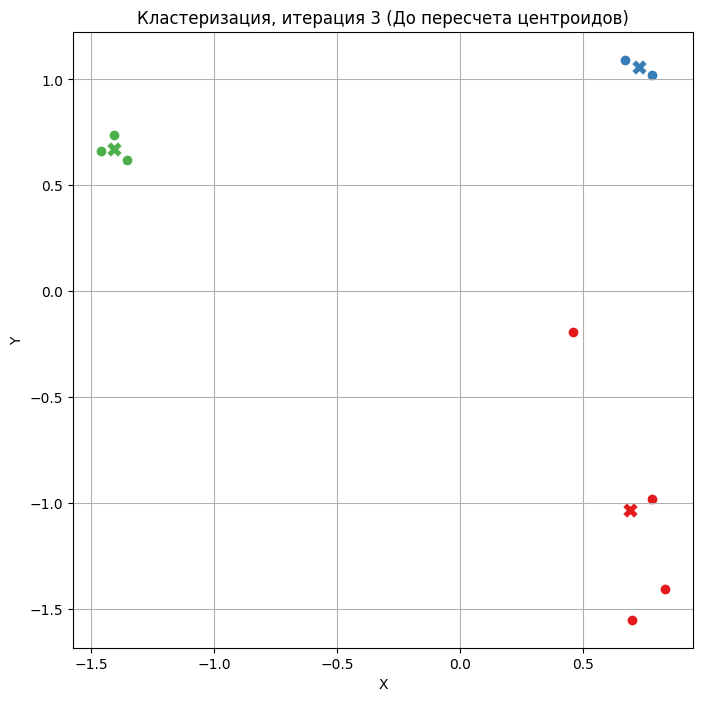

<Figure size 640x480 with 0 Axes>

In [ ]:
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def assign_clusters(data, centroids):
  clusters = {}

  for i in range(len(centroids)):
    clusters[i] = []

  for point in data:
    distances = []
    for centroid in centroids:
      distances.append(distance(point, centroid))
    near_cent_idx = distances.index(min(distances))
    clusters[near_cent_idx].append(point)
  return clusters

def calculate_new_centroids(clusters):
    new_centroids = []
    for cluster_points in clusters.values():
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def plot_clusters(data, clusters, centroids, iteration, initial_centroids=None, isAfterCalculateCentroids = '(После пересчета центроидов)'):
    plt.figure(figsize=(8, 8))
    if initial_centroids is not None:
        plt.scatter(data[:, 0], data[:, 1])
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='X', s=100, color='black', linewidth=0.2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Начальный выбор центроидов')
        plt.grid(True)
        plt.show()
        plt.clf()
        return

    colors = plt.cm.get_cmap('Set1').colors[:len(clusters.keys())]

    for i, (cluster_points, color) in enumerate(zip(clusters.values(), colors)):
        cluster_points = np.array(cluster_points)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color)

        centroid_color = colors[i]  # для центроидов
        centroid = centroids[i]
        plt.scatter(centroid[0], centroid[1], marker='X', s=100, color=centroid_color, linewidth=0.2)


    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Кластеризация, итерация {iteration} {isAfterCalculateCentroids}')
    plt.grid(True)
    plt.show()

def kmeans(data, k, show_initial_centroids=True):
    random_indices = np.random.choice(len(data), k, replace=False)
    initial_centroids = data[random_indices, :]

    centroids = initial_centroids
    prev_clusters = None
    iter = 1

    while(True):
        clusters = assign_clusters(data, centroids)

        if show_initial_centroids:
          plot_clusters(data, {}, initial_centroids, 0, initial_centroids)
          show_initial_centroids = False
          continue

        plot_clusters(data, clusters, centroids, iter, isAfterCalculateCentroids='(До пересчета центроидов)')
        plt.clf()

        # остановка
        if prev_clusters is not None and all(np.array_equal(clusters.get(i, []), prev_clusters.get(i, [])) for i in range(k)):
            break

        # новые центроиды
        centroids = calculate_new_centroids(clusters)
        prev_clusters = {k: np.array(v) for k, v in clusters.items()}
        plot_clusters(data, clusters, centroids, iter)

        plt.clf()
        iter += 1

        centroids_dict = {}
        for i, cluster in enumerate(clusters.values()):
          centroids_dict[f'Кластер {i+1}'] = {
            'Центроид': centroids[i],
            'Точки': cluster
          }
        print(f"Словарь с центроидами и их точками:\n{centroids_dict}")


    return clusters, centroids

# начало работы
data = np.column_stack((norm_X, norm_Y))
clusters, centroids = kmeans(data, k=3, show_initial_centroids=True)


# Иерархический кластерный анализ

Средние значения: X: 1.2777777777777781, Y: -1.1444444444444446
Стандартные отколенения: X: 3.751674523248927, Y: 6.993665564258228
X_norm: [ 0.83222097  0.69894715  0.77891144  0.77891144  0.67229239 -1.3534697
 -1.46008875 -1.40677922  0.45905427]
Y_norm: [-1.40921173 -1.55219827 -0.98025213  1.02155935  1.09305262  0.62119705
  0.66409301  0.73558628 -0.19382619]


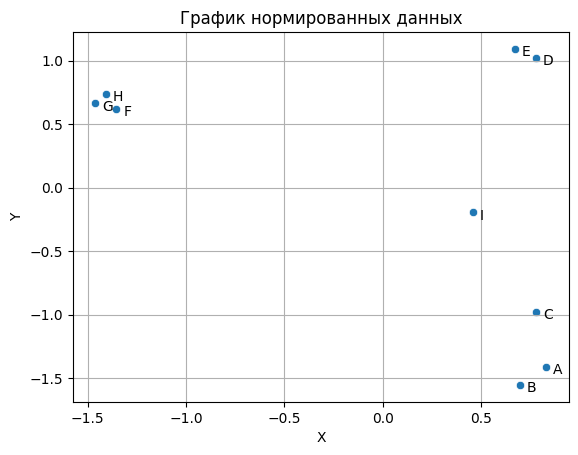

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Исходные данные
X = np.array([4.4, 3.9, 4.2, 4.2, 3.8, -3.8, -4.2, -4, 3.0])
Y = np.array([-11, -12, -8, 6, 6.5, 3.2, 3.5, 4, -2.5])

# Вычисление средних значений
mean_X = np.mean(X)
mean_Y = np.mean(Y)

print(f"Средние значения: X: {mean_X}, Y: {mean_Y}")

# Вычисление стандартных отклонений
std_dev_X = np.sqrt(np.sum((X - mean_X)**2) / len(X))
std_dev_Y = np.sqrt(np.sum((Y - mean_Y)**2) / len(Y))

print(f"Стандартные отколенения: X: {std_dev_X}, Y: {std_dev_Y}")

norm_X = (X - mean_X) / std_dev_X
norm_Y = (Y - mean_Y) / std_dev_Y

data = np.array(list(zip(norm_X, norm_Y)))
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I'}

print(f"X_norm: {norm_X}")
print(f"Y_norm: {norm_Y}")

sns.scatterplot(x=norm_X, y=norm_Y)
for i, (x, y, label) in enumerate(zip(norm_X, norm_Y, labels.values())):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, -5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График нормированных данных')
plt.grid(True)
plt.show()

$σ = \sqrt{\frac{\sum_{i=1}^{N}(X_i - \overline{X})^2}{N}}$ $Z_i = \frac{X_i - \overline{X}}{\sigma_X}$

## 1)

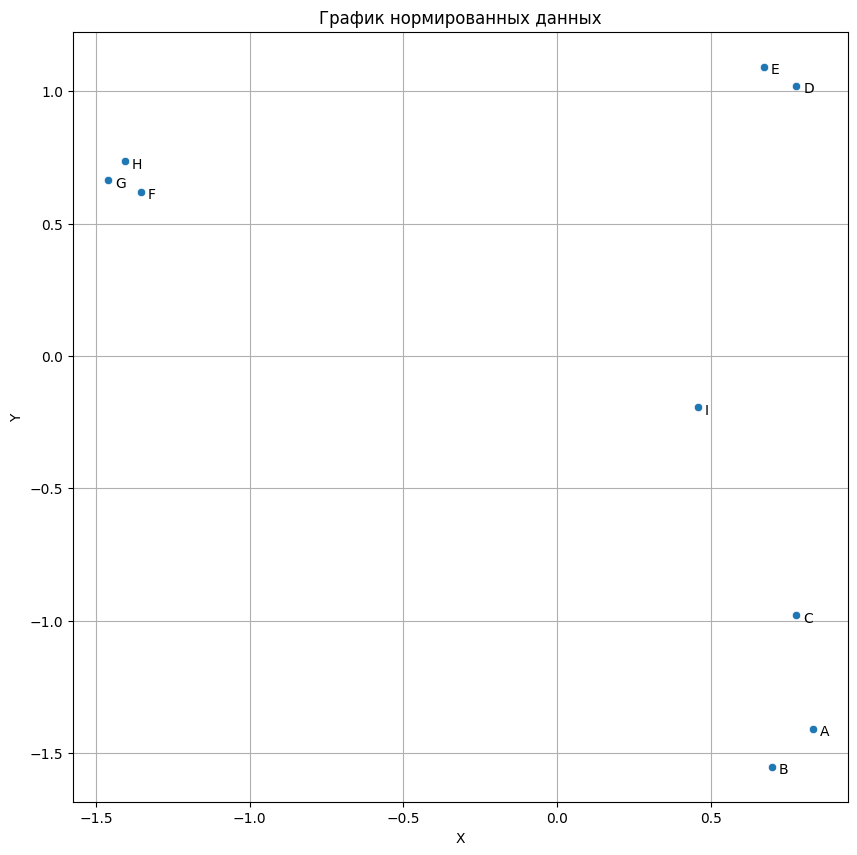

[0 1 2 3 4 5 6 6 8]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k


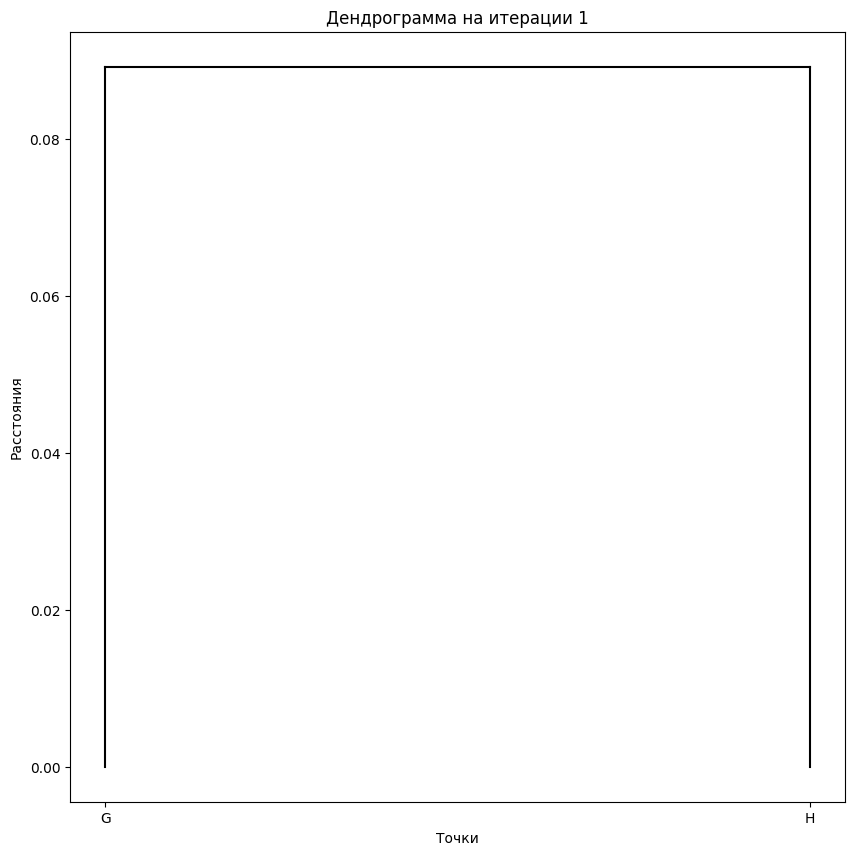

Точки: G - H, Расстояние: 0.08918067653838346
[0 1 2 3 4 5 5 5 8]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k


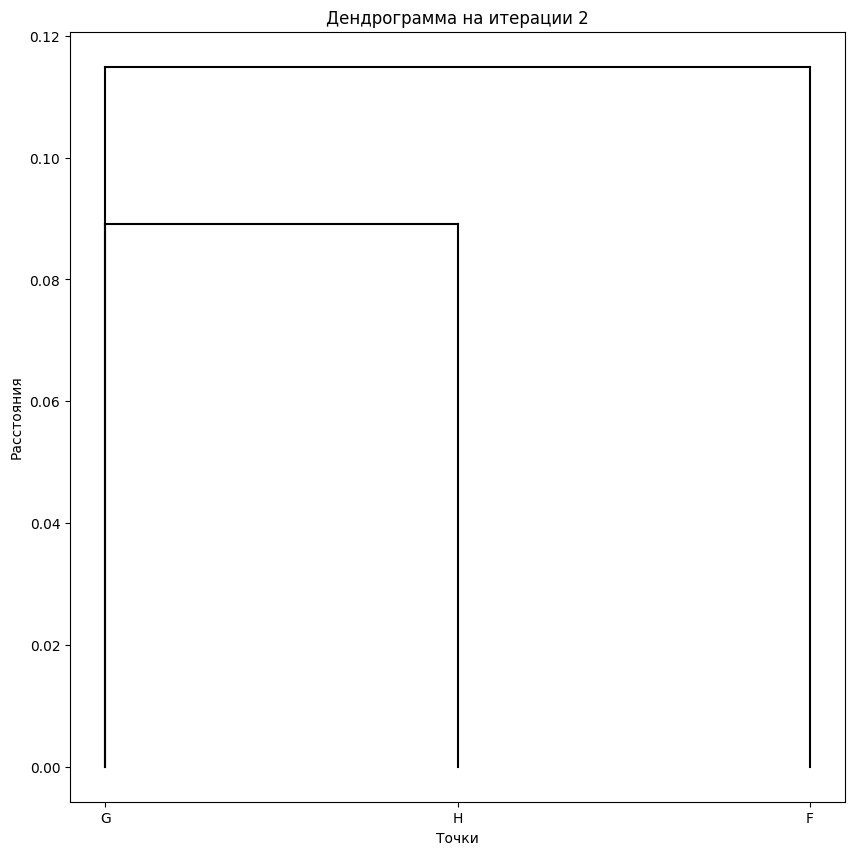

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
[0 1 2 3 3 5 5 5 8]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k


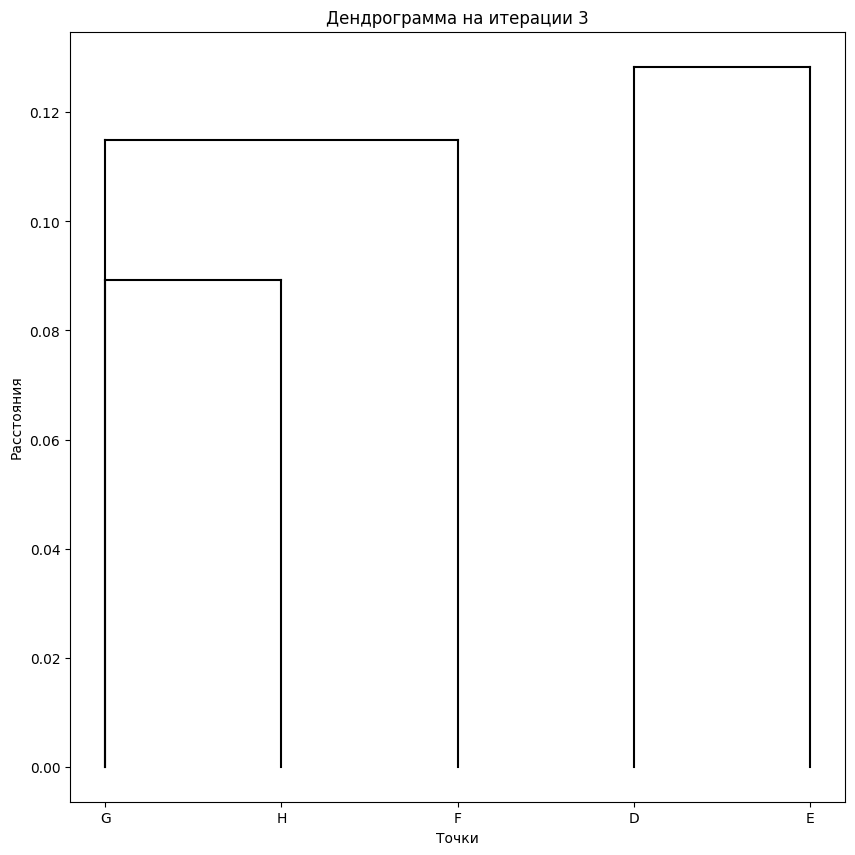

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
[0 0 2 3 3 5 5 5 8]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k
[0, 0] [0, 0.19546626407517773] k
['B', 'B'] [0, 0.19546626407517773] k
['A', 'B'] [0.19546626407517773, 0.19546626407517773] k


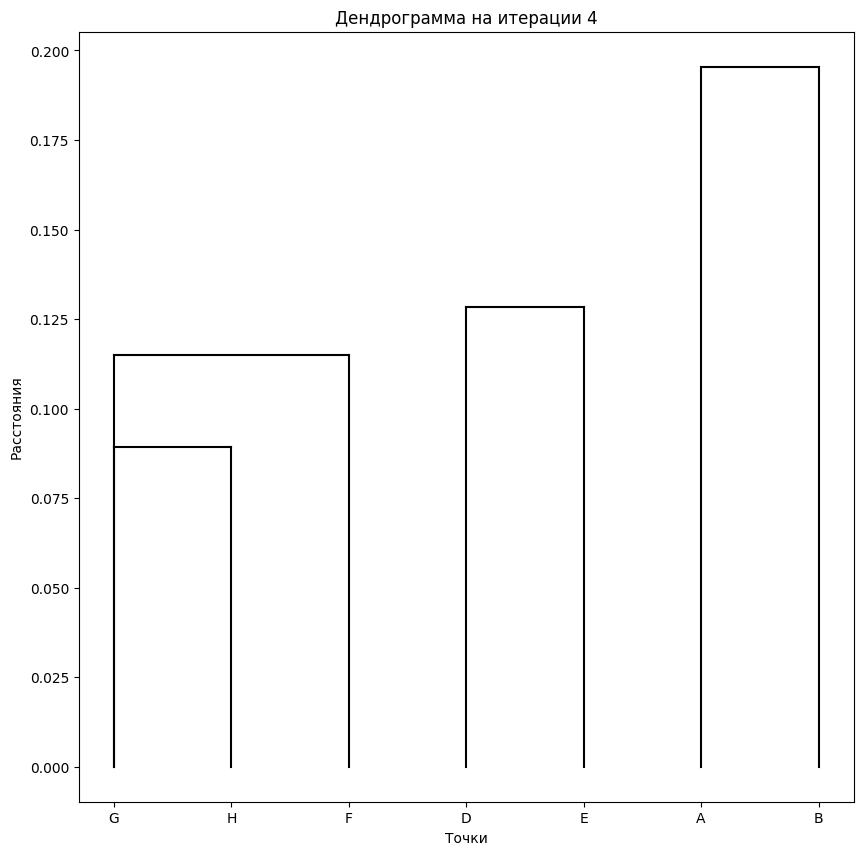

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
Точки: A - B, Расстояние: 0.19546626407517773
[0 0 0 3 3 5 5 5 8]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k
[0, 0] [0, 0.19546626407517773] k
['B', 'B'] [0, 0.19546626407517773] k
['A', 'B'] [0.19546626407517773, 0.19546626407517773] k
[0, 0] [0, 0.4322594664682728] k
['C', 'C'] [0, 0.4322594664682728] k
['A', 'C'] [0.4322594664682728, 0.4322594664682728] k


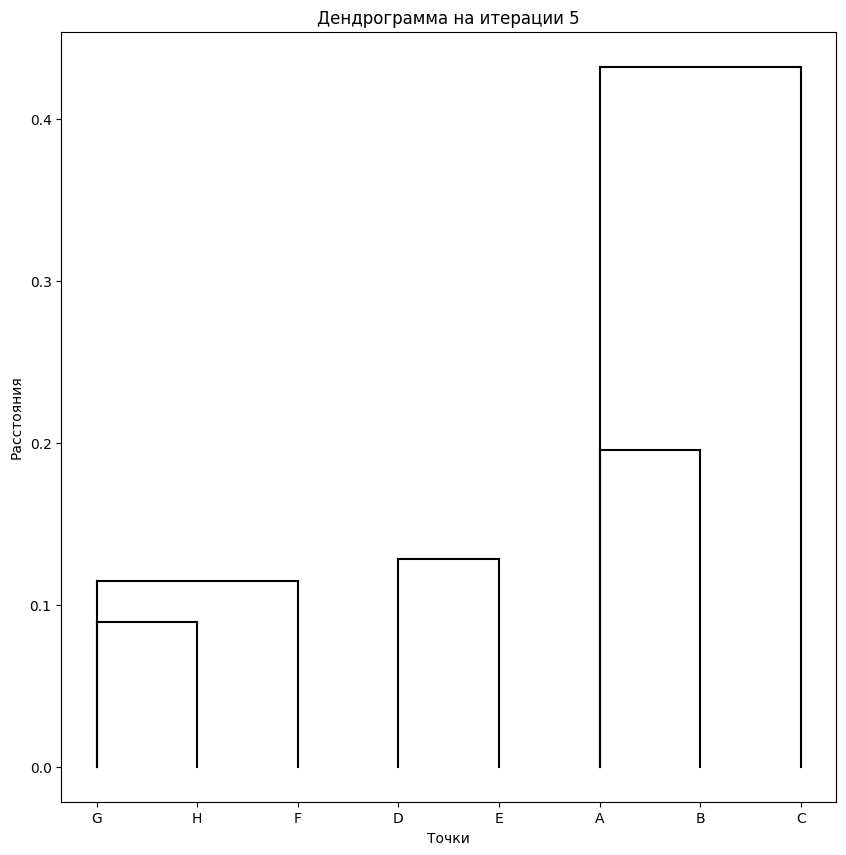

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
Точки: A - B, Расстояние: 0.19546626407517773
Точки: A - C, Расстояние: 0.4322594664682728
[0 0 0 3 3 5 5 5 0]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k
[0, 0] [0, 0.19546626407517773] k
['B', 'B'] [0, 0.19546626407517773] k
['A', 'B'] [0.19546626407517773, 0.19546626407517773] k
[0, 0] [0, 0.4322594664682728] k
['C', 'C'] [0, 0.4322594664682728] k
['A', 'C'] [0.4322594664682728, 0.4322594664682728] k
[2, 2] [0, 0.8489843140834059] k
['I', 'I'] [0, 0.8489843140834059] k
['C', 'I'] [0.8489843140834059, 0.84898431408

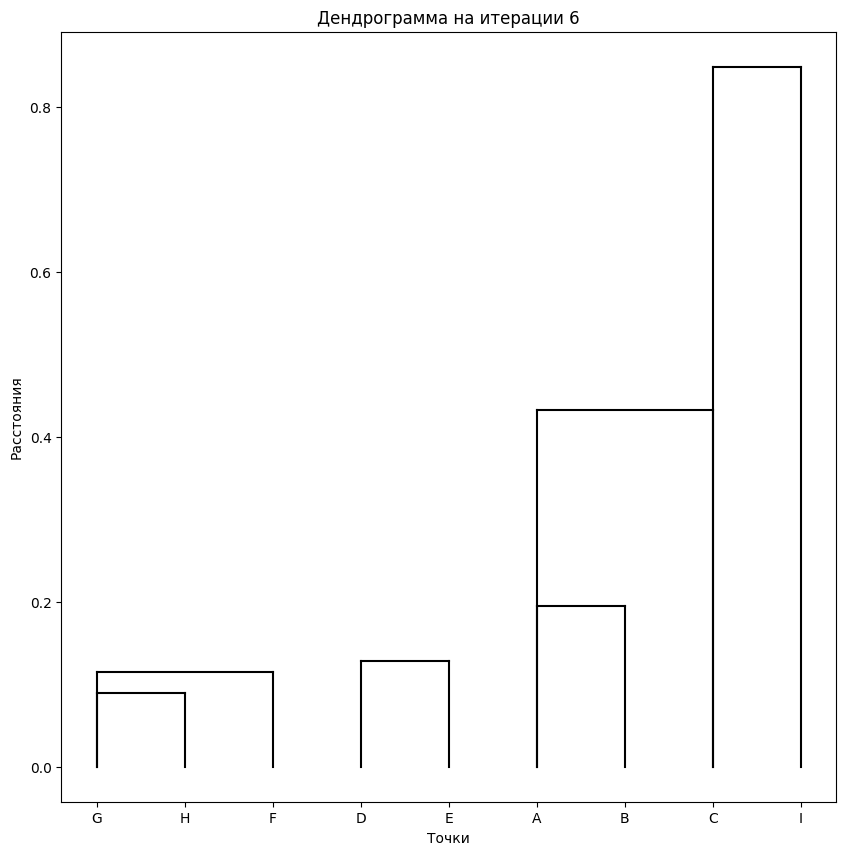

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
Точки: A - B, Расстояние: 0.19546626407517773
Точки: A - C, Расстояние: 0.4322594664682728
Точки: C - I, Расстояние: 0.8489843140834059
[3 3 3 3 3 5 5 5 3]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k
[0, 0] [0, 0.19546626407517773] k
['B', 'B'] [0, 0.19546626407517773] k
['A', 'B'] [0.19546626407517773, 0.19546626407517773] k
[0, 0] [0, 0.4322594664682728] k
['C', 'C'] [0, 0.4322594664682728] k
['A', 'C'] [0.4322594664682728, 0.4322594664682728] k
[2, 2] [0, 0.8489843140834059] k
['I', 'I'] [0, 0.8489843140834059] k


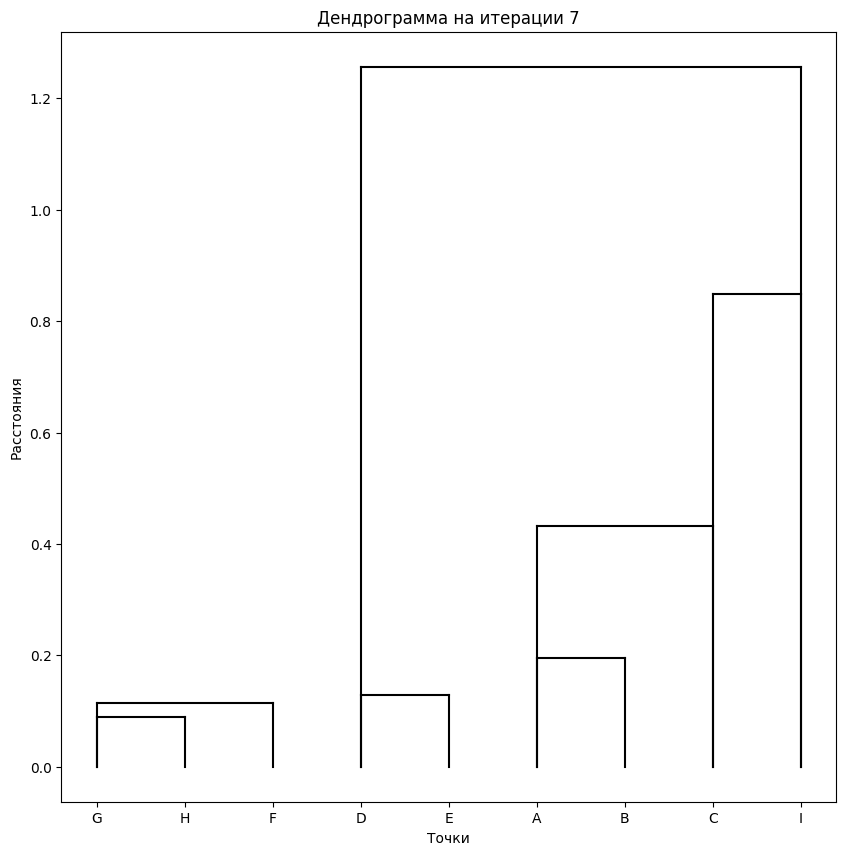

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
Точки: A - B, Расстояние: 0.19546626407517773
Точки: A - C, Расстояние: 0.4322594664682728
Точки: C - I, Расстояние: 0.8489843140834059
Точки: D - I, Расстояние: 1.256769915824258
[5 5 5 5 5 5 5 5 5]
[6, 6] [0, 0.08918067653838346] k
['H', 'H'] [0, 0.08918067653838346] k
['G', 'H'] [0.08918067653838346, 0.08918067653838346] k
[5, 5] [0, 0.11492470026013406] k
['G', 'G'] [0, 0.11492470026013406] k
['F', 'G'] [0.11492470026013406, 0.11492470026013406] k
[3, 3] [0, 0.12837020901031915] k
['E', 'E'] [0, 0.12837020901031915] k
['D', 'E'] [0.12837020901031915, 0.12837020901031915] k
[0, 0] [0, 0.19546626407517773] k
['B', 'B'] [0, 0.19546626407517773] k
['A', 'B'] [0.19546626407517773, 0.19546626407517773] k
[0, 0] [0, 0.4322594664682728] k
['C', 'C'] [0, 0.4322594664682728] k
['A', 'C'] [0.4322594664682728, 0.4322594664682728] k
[2, 2] [0, 0.8489843140834

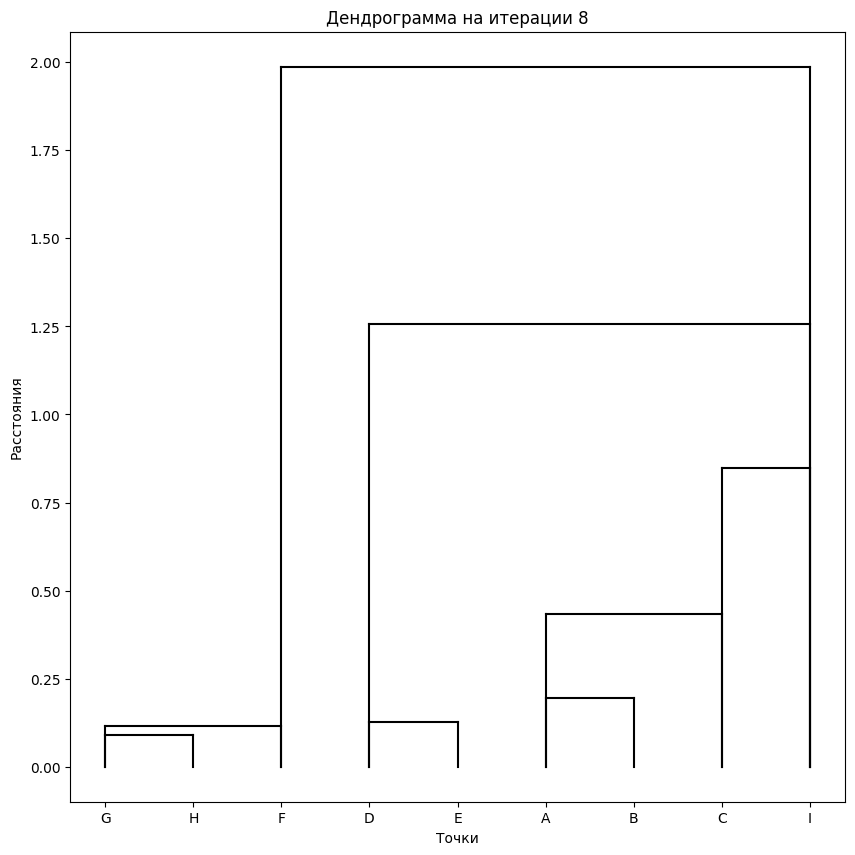

Точки: G - H, Расстояние: 0.08918067653838346
Точки: F - G, Расстояние: 0.11492470026013406
Точки: D - E, Расстояние: 0.12837020901031915
Точки: A - B, Расстояние: 0.19546626407517773
Точки: A - C, Расстояние: 0.4322594664682728
Точки: C - I, Расстояние: 0.8489843140834059
Точки: D - I, Расстояние: 1.256769915824258
Точки: F - I, Расстояние: 1.9873364159372668


In [ ]:
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def label_from_number(label):
  return labels[label]

def label_to_letter(label):
    return labels.get(label, str(label))

def print_merge_history(merge_history):
    for merge in merge_history:
        print(f'Точки: {label_to_letter(merge[0])} - {label_to_letter(merge[1])}, Расстояние: {merge[2]}')

def sequential_clustering(data):
    distance_matrix = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(i + 1, data.shape[0]):
            distance_matrix[i, j] = distance(data[i], data[j])

    # метки
    cluster_labels = np.arange(data.shape[0])
    merge_history = []

    while len(np.unique(cluster_labels)) > 1:
        min_distance = np.inf
        min_i = None
        min_j = None
        for i in range(data.shape[0]):
            for j in range(i + 1, data.shape[0]):
                if cluster_labels[i] != cluster_labels[j] and distance_matrix[i, j] < min_distance:
                    min_distance = distance_matrix[i, j]
                    min_i = i
                    min_j = j

        cluster_labels[cluster_labels == cluster_labels[min_j]] = cluster_labels[min_i]
        print(cluster_labels)
        merge_history.append((min_i, min_j, min_distance))

        plt.figure(figsize=(10, 10))
        plt.title(f'Дендрограмма на итерации {len(merge_history)}')
        for merge in merge_history:
          # print([label_from_number(merge[0]), label_from_number(merge[0])], [0, merge[2]], 'k')
          # print([label_from_number(merge[1]), label_from_number(merge[1])], [0, merge[2]], 'k')
          # print([label_from_number(merge[0]), label_from_number(merge[1])], [merge[2], merge[2]], 'k')
          plt.plot([label_from_number(merge[0]), label_from_number(merge[0])], [0, merge[2]], 'k')
          plt.plot([label_from_number(merge[1]), label_from_number(merge[1])], [0, merge[2]], 'k')
          plt.plot([label_from_number(merge[0]), label_from_number(merge[1])], [merge[2], merge[2]], 'k')
        plt.xlabel('Точки')
        plt.ylabel('Расстояния')
        plt.show()
        print_merge_history(merge_history)

    return merge_history

plt.figure(figsize=(10, 10))
sns.scatterplot(x=norm_X, y=norm_Y)
for i, (x, y, label) in enumerate(zip(norm_X, norm_Y, labels.values())):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, -5))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('График нормированных данных')
plt.grid(True)
plt.show()
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I'}
merge_history = sequential_clustering(data)

## 2)

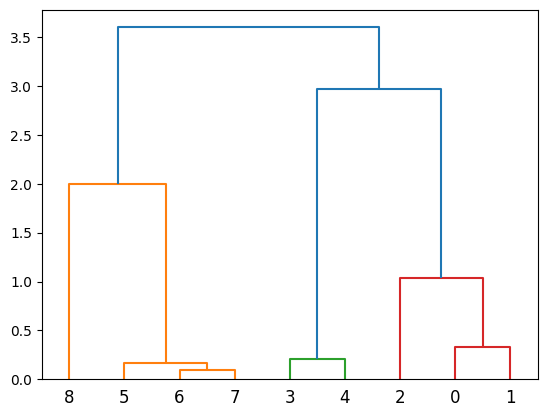

In [ ]:
import scipy.cluster.hierarchy as sch

distance_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
  for j in range(i + 1, data.shape[0]):
    distance_matrix[i, j] = distance(data[i], data[j])

dendrogram = sch.dendrogram(sch.linkage(distance_matrix, method='single'))

# print(data)
plt.show(dendrogram)

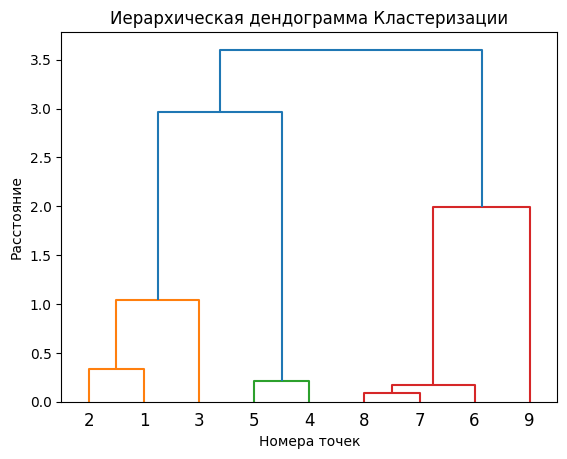

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

distance_matrix = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
  for j in range(i + 1, data.shape[0]):
    distance_matrix[i, j] = distance(data[i], data[j])

linkage_matrix = linkage(distance_matrix, method='single')

dendrogram(linkage_matrix, labels=list(range(1, len(data) + 1)), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Иерархическая дендограмма Кластеризации')
plt.xlabel('Номера точек')
plt.ylabel('Расстояние')
plt.show()